In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Universities.xlsx')

In [3]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

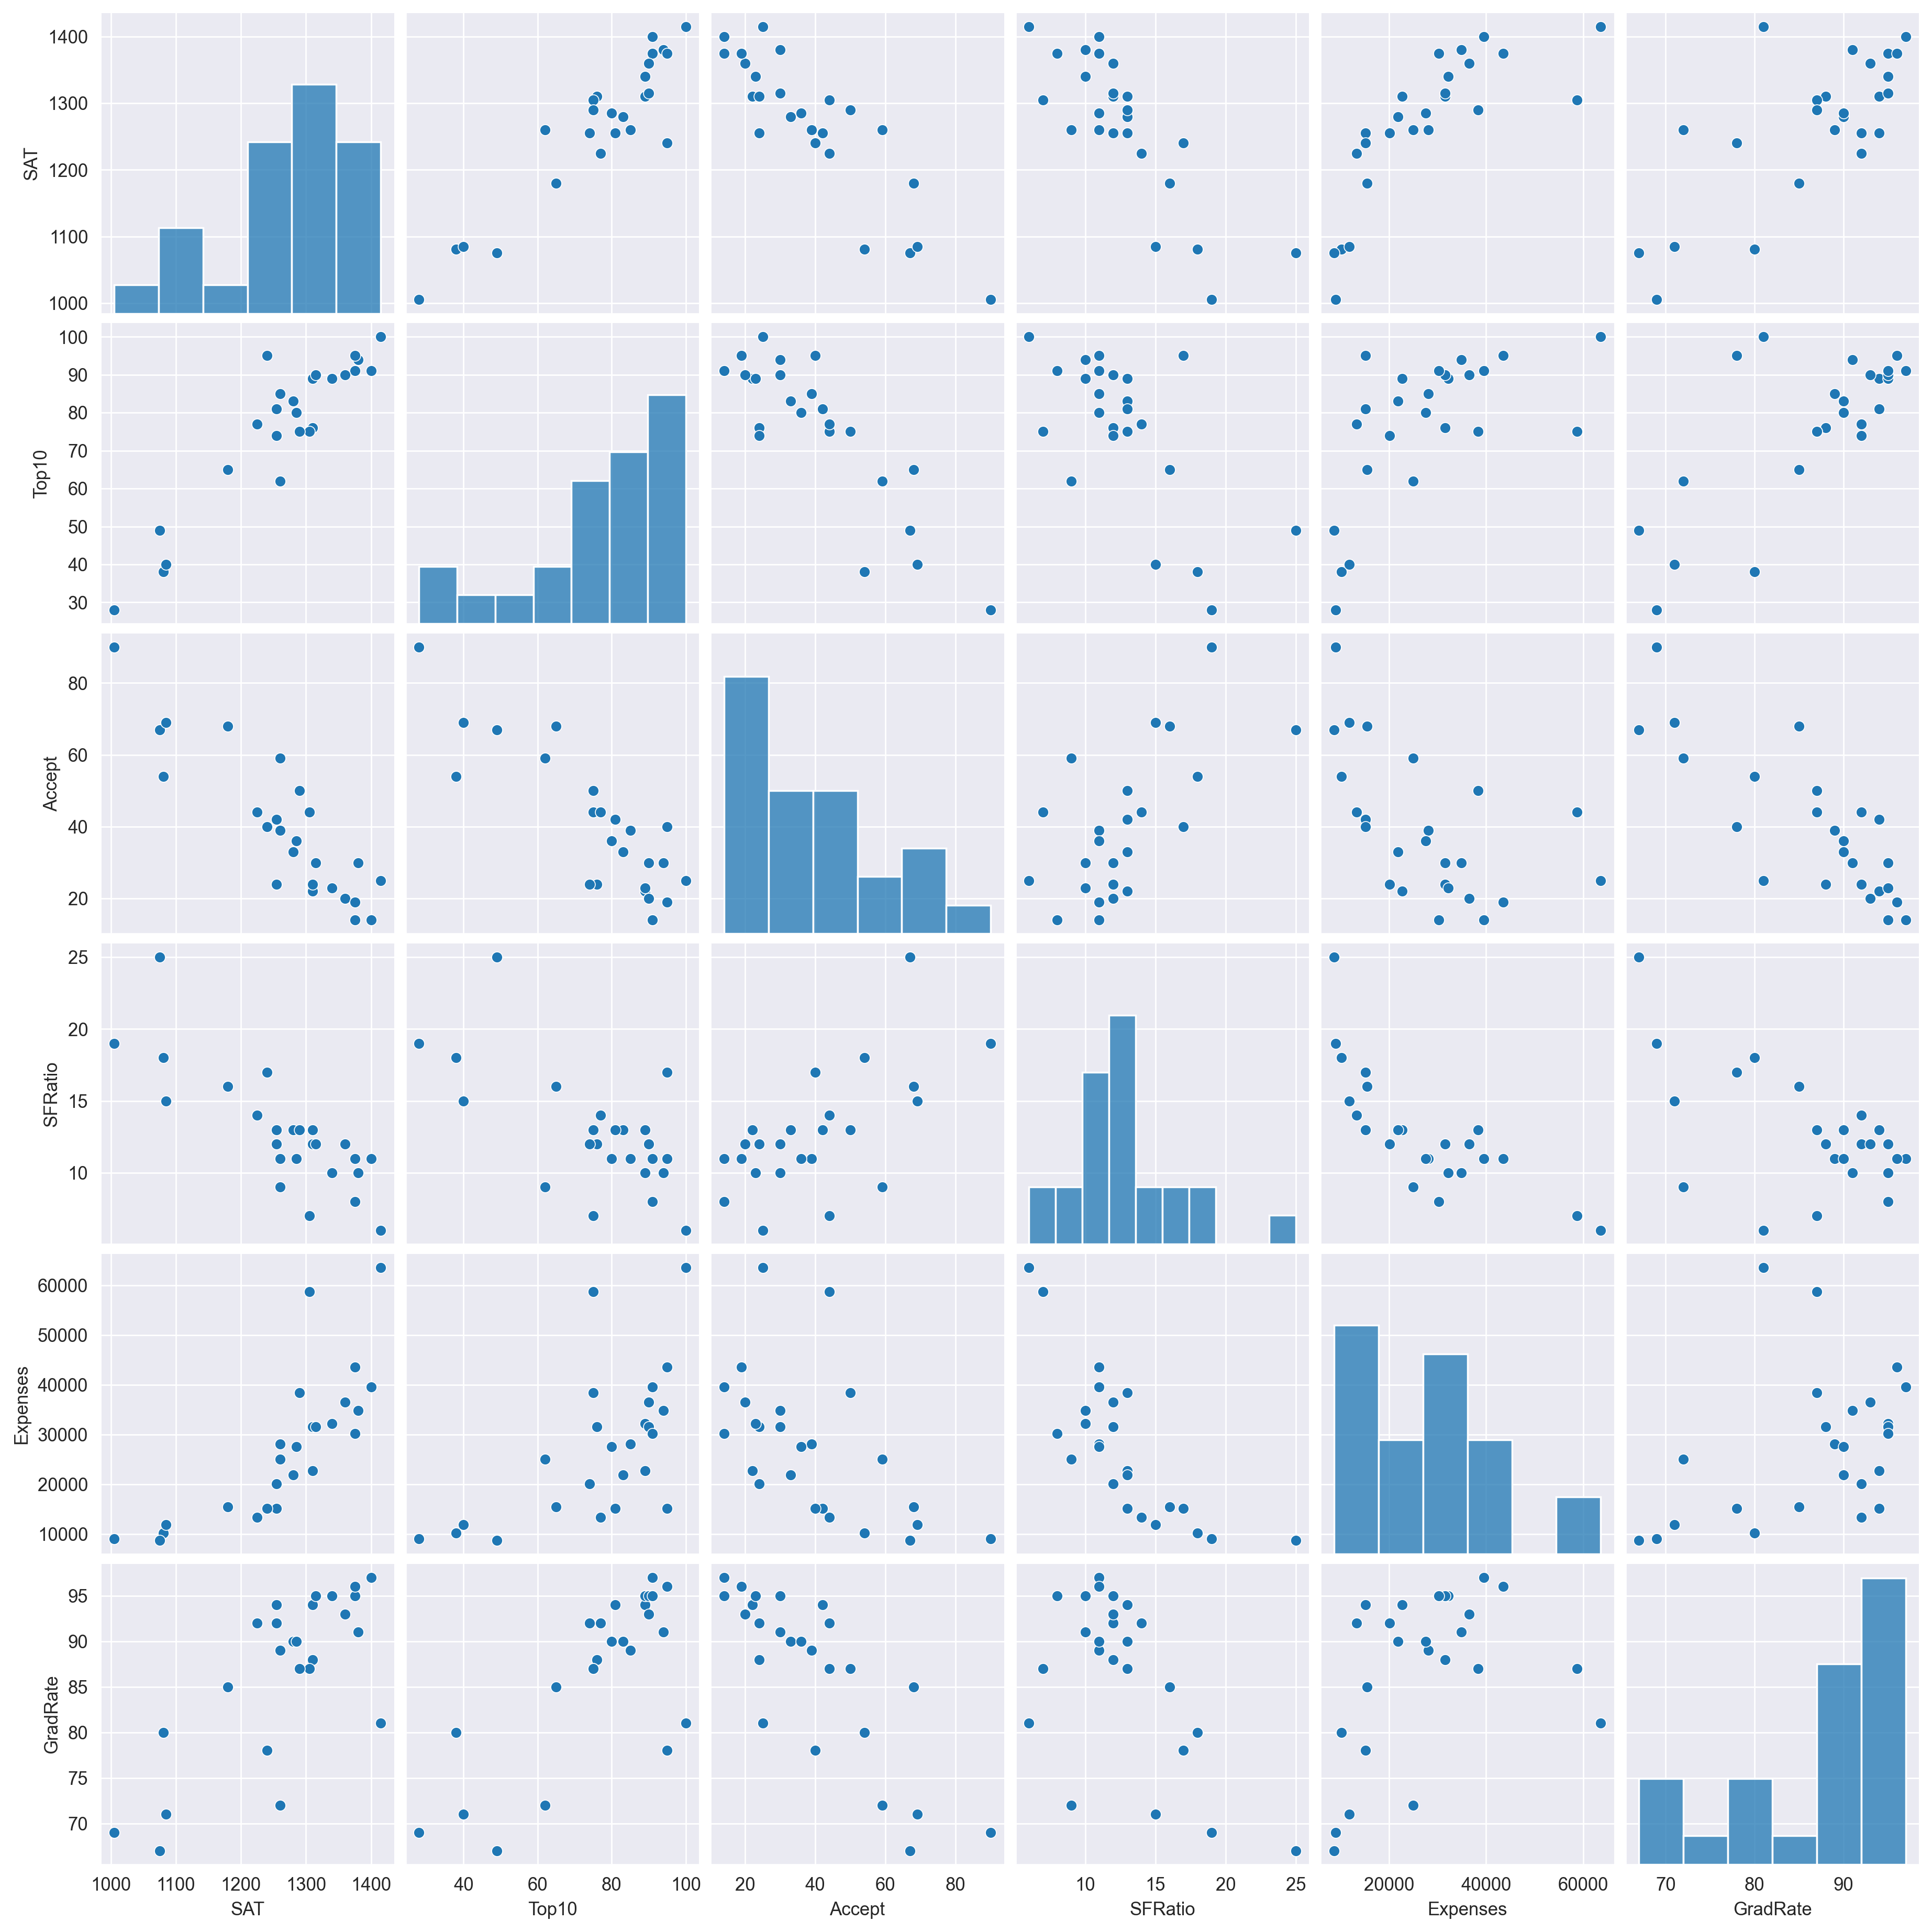

In [5]:
sns.pairplot(df)

In [6]:
x = df.drop(columns=['Univ'])
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [9]:
from scipy.cluster import hierarchy

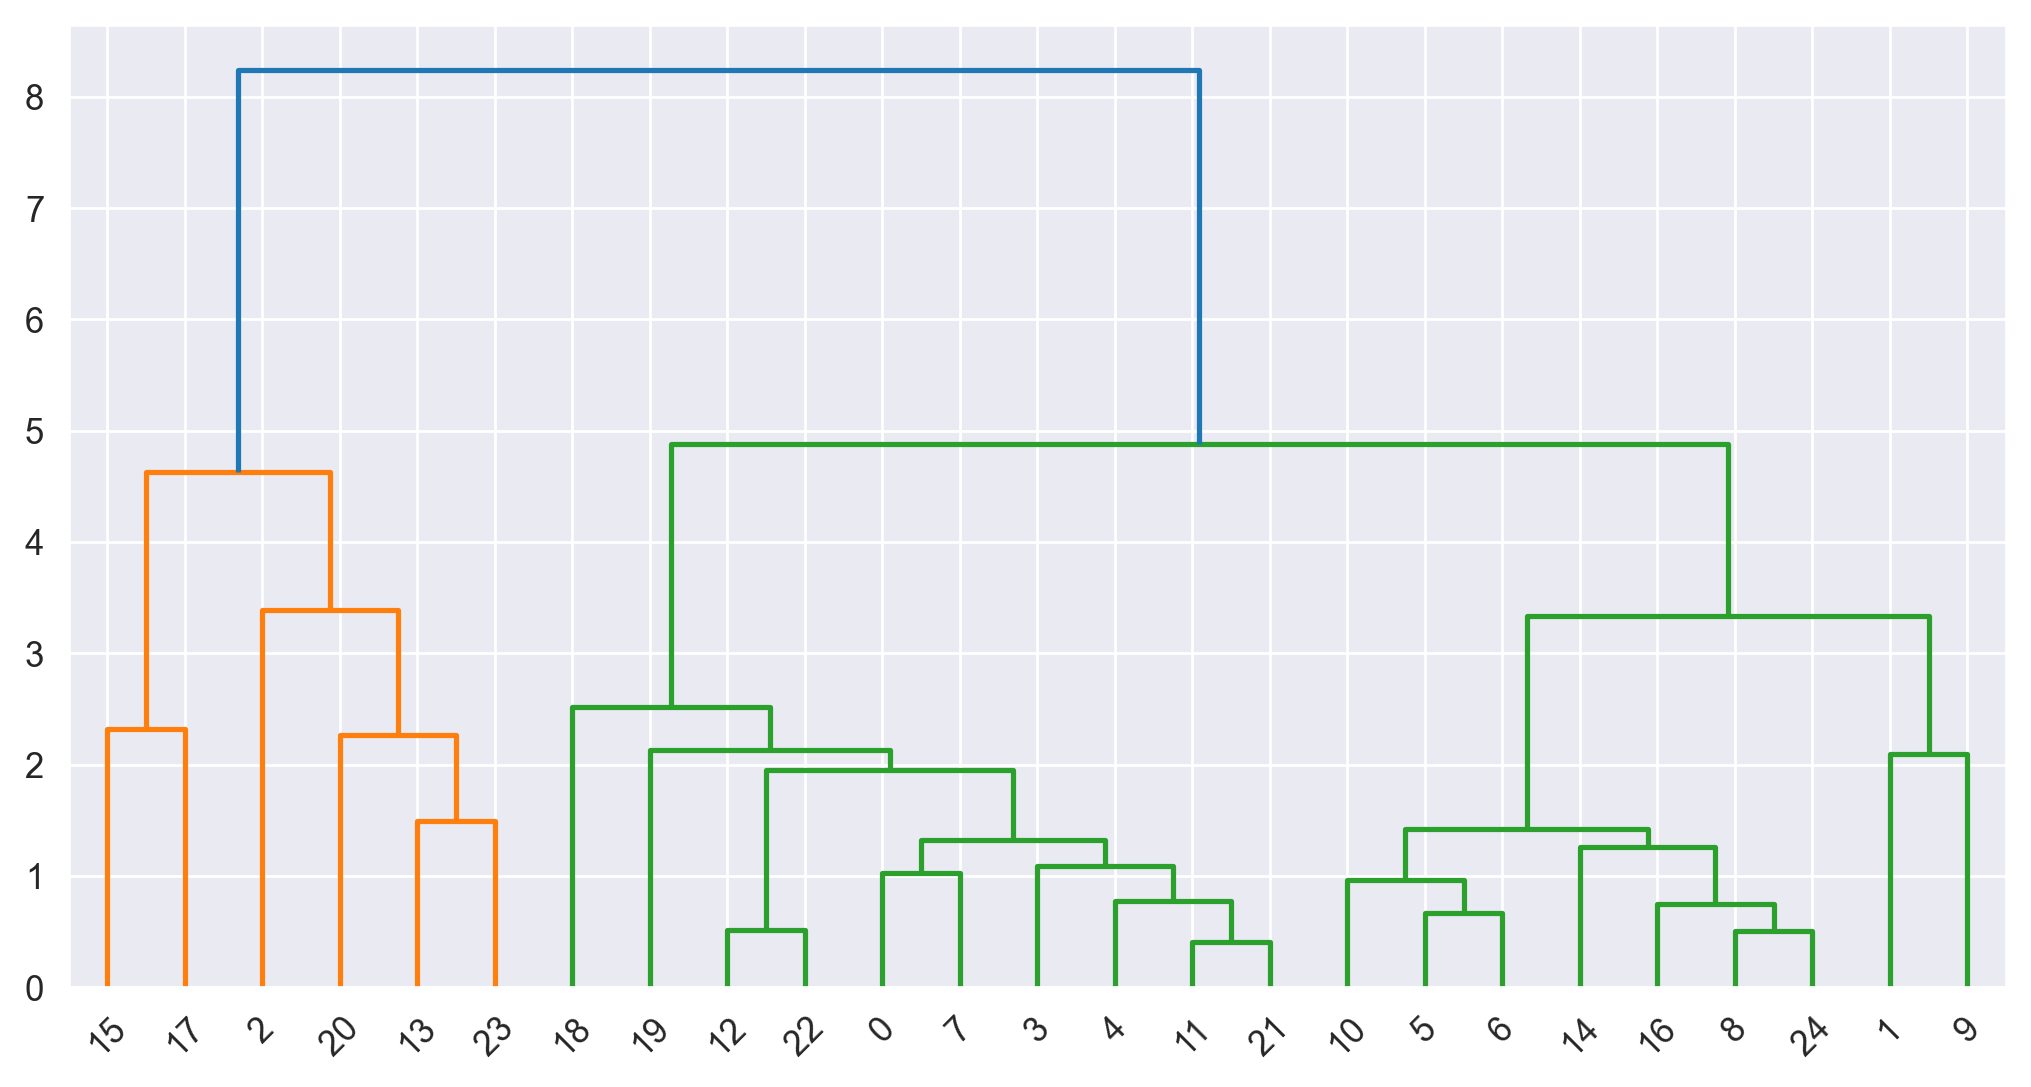

In [10]:
lk = hierarchy.linkage(x,method='complete')
dendeogram = hierarchy.dendrogram(lk)

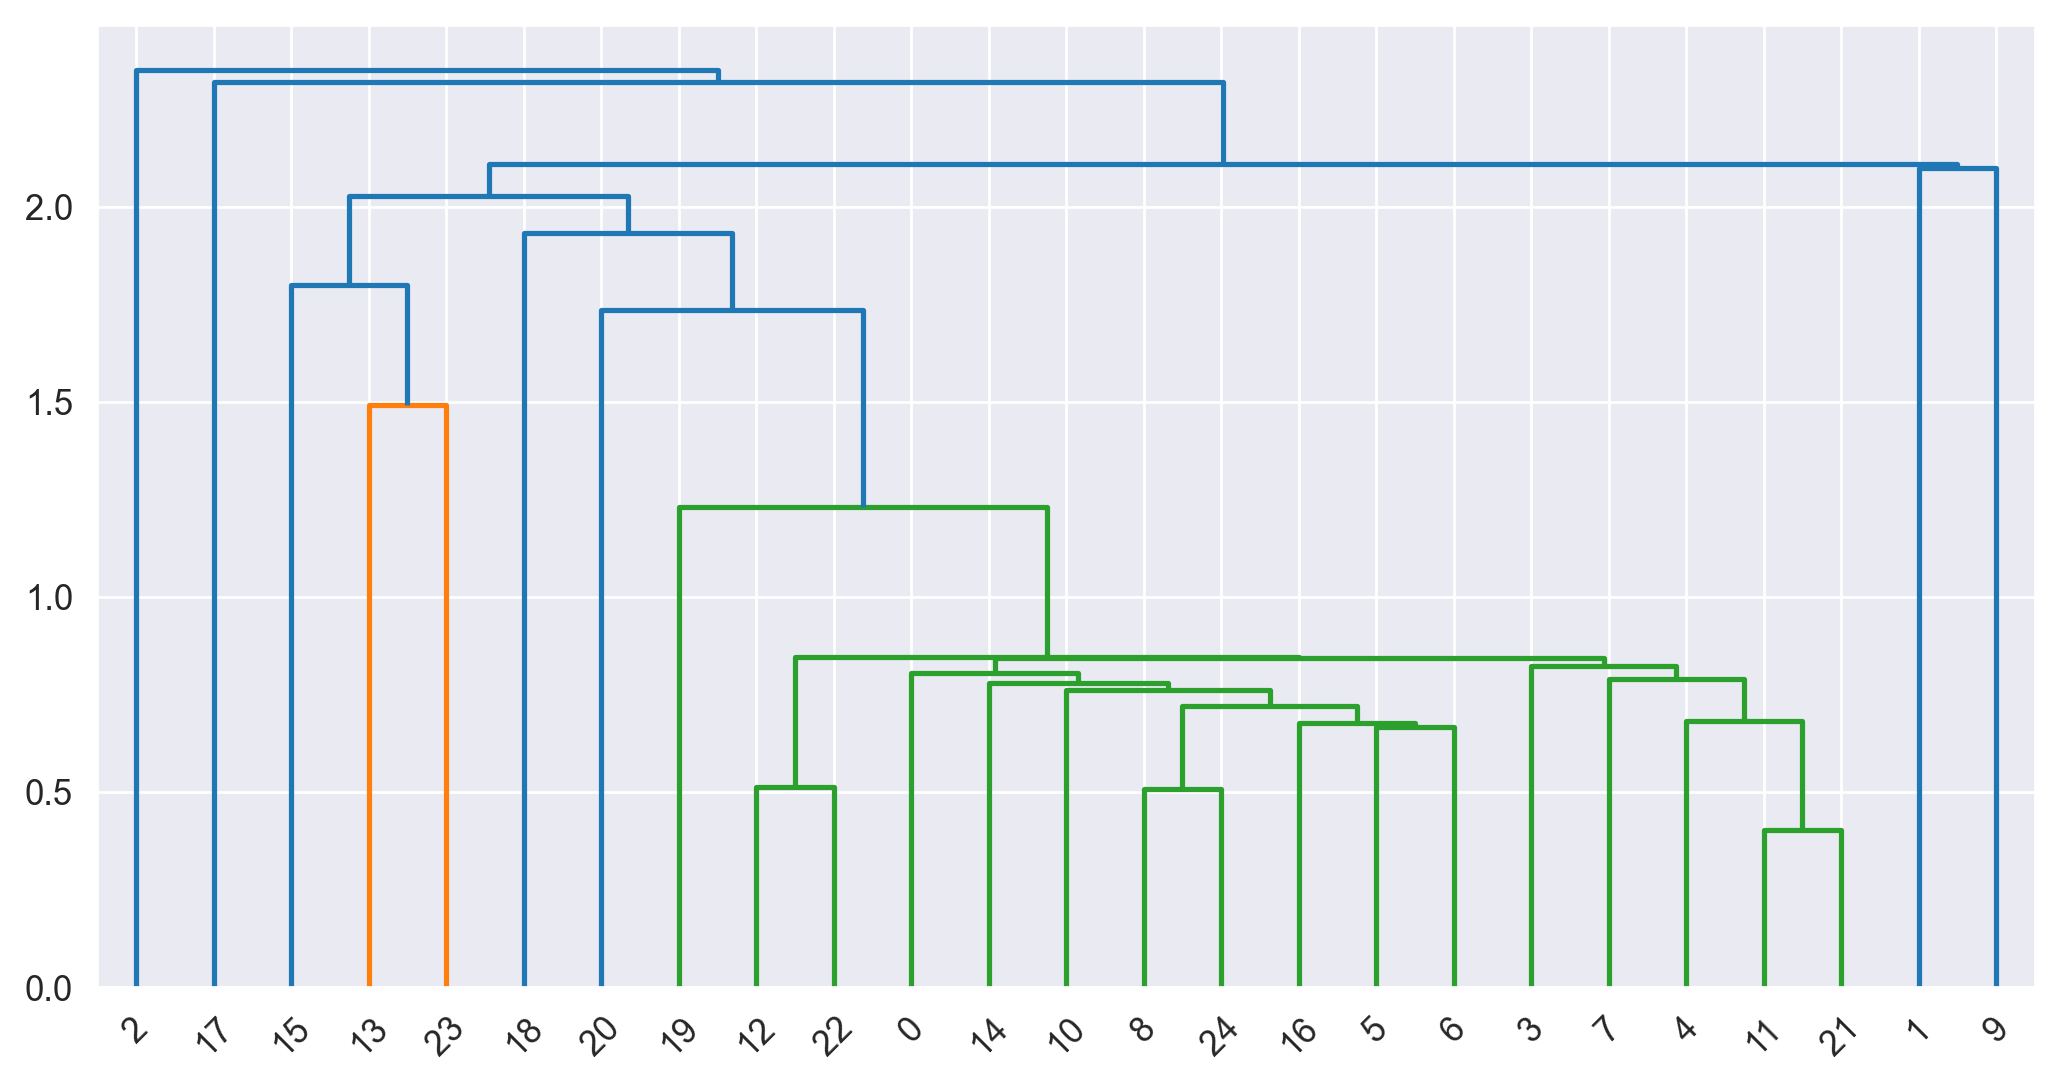

In [11]:
lk = hierarchy.linkage(x,method='single')
dendrogram = hierarchy.dendrogram(lk)

In [12]:
from sklearn.cluster import AgglomerativeClustering

Model Building

In [13]:
hc= AgglomerativeClustering(n_clusters=2)
y = hc.fit_predict(x)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [15]:
df['Cluster'] = y

In [16]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [17]:
df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1305.47619,83.666667,33.333333,11.47619,30708.952381,89.571429
1,1061.50000,38.750000,70.000000,19.25000,9953.000000,71.750000


<AxesSubplot:xlabel='Top10', ylabel='Expenses'>

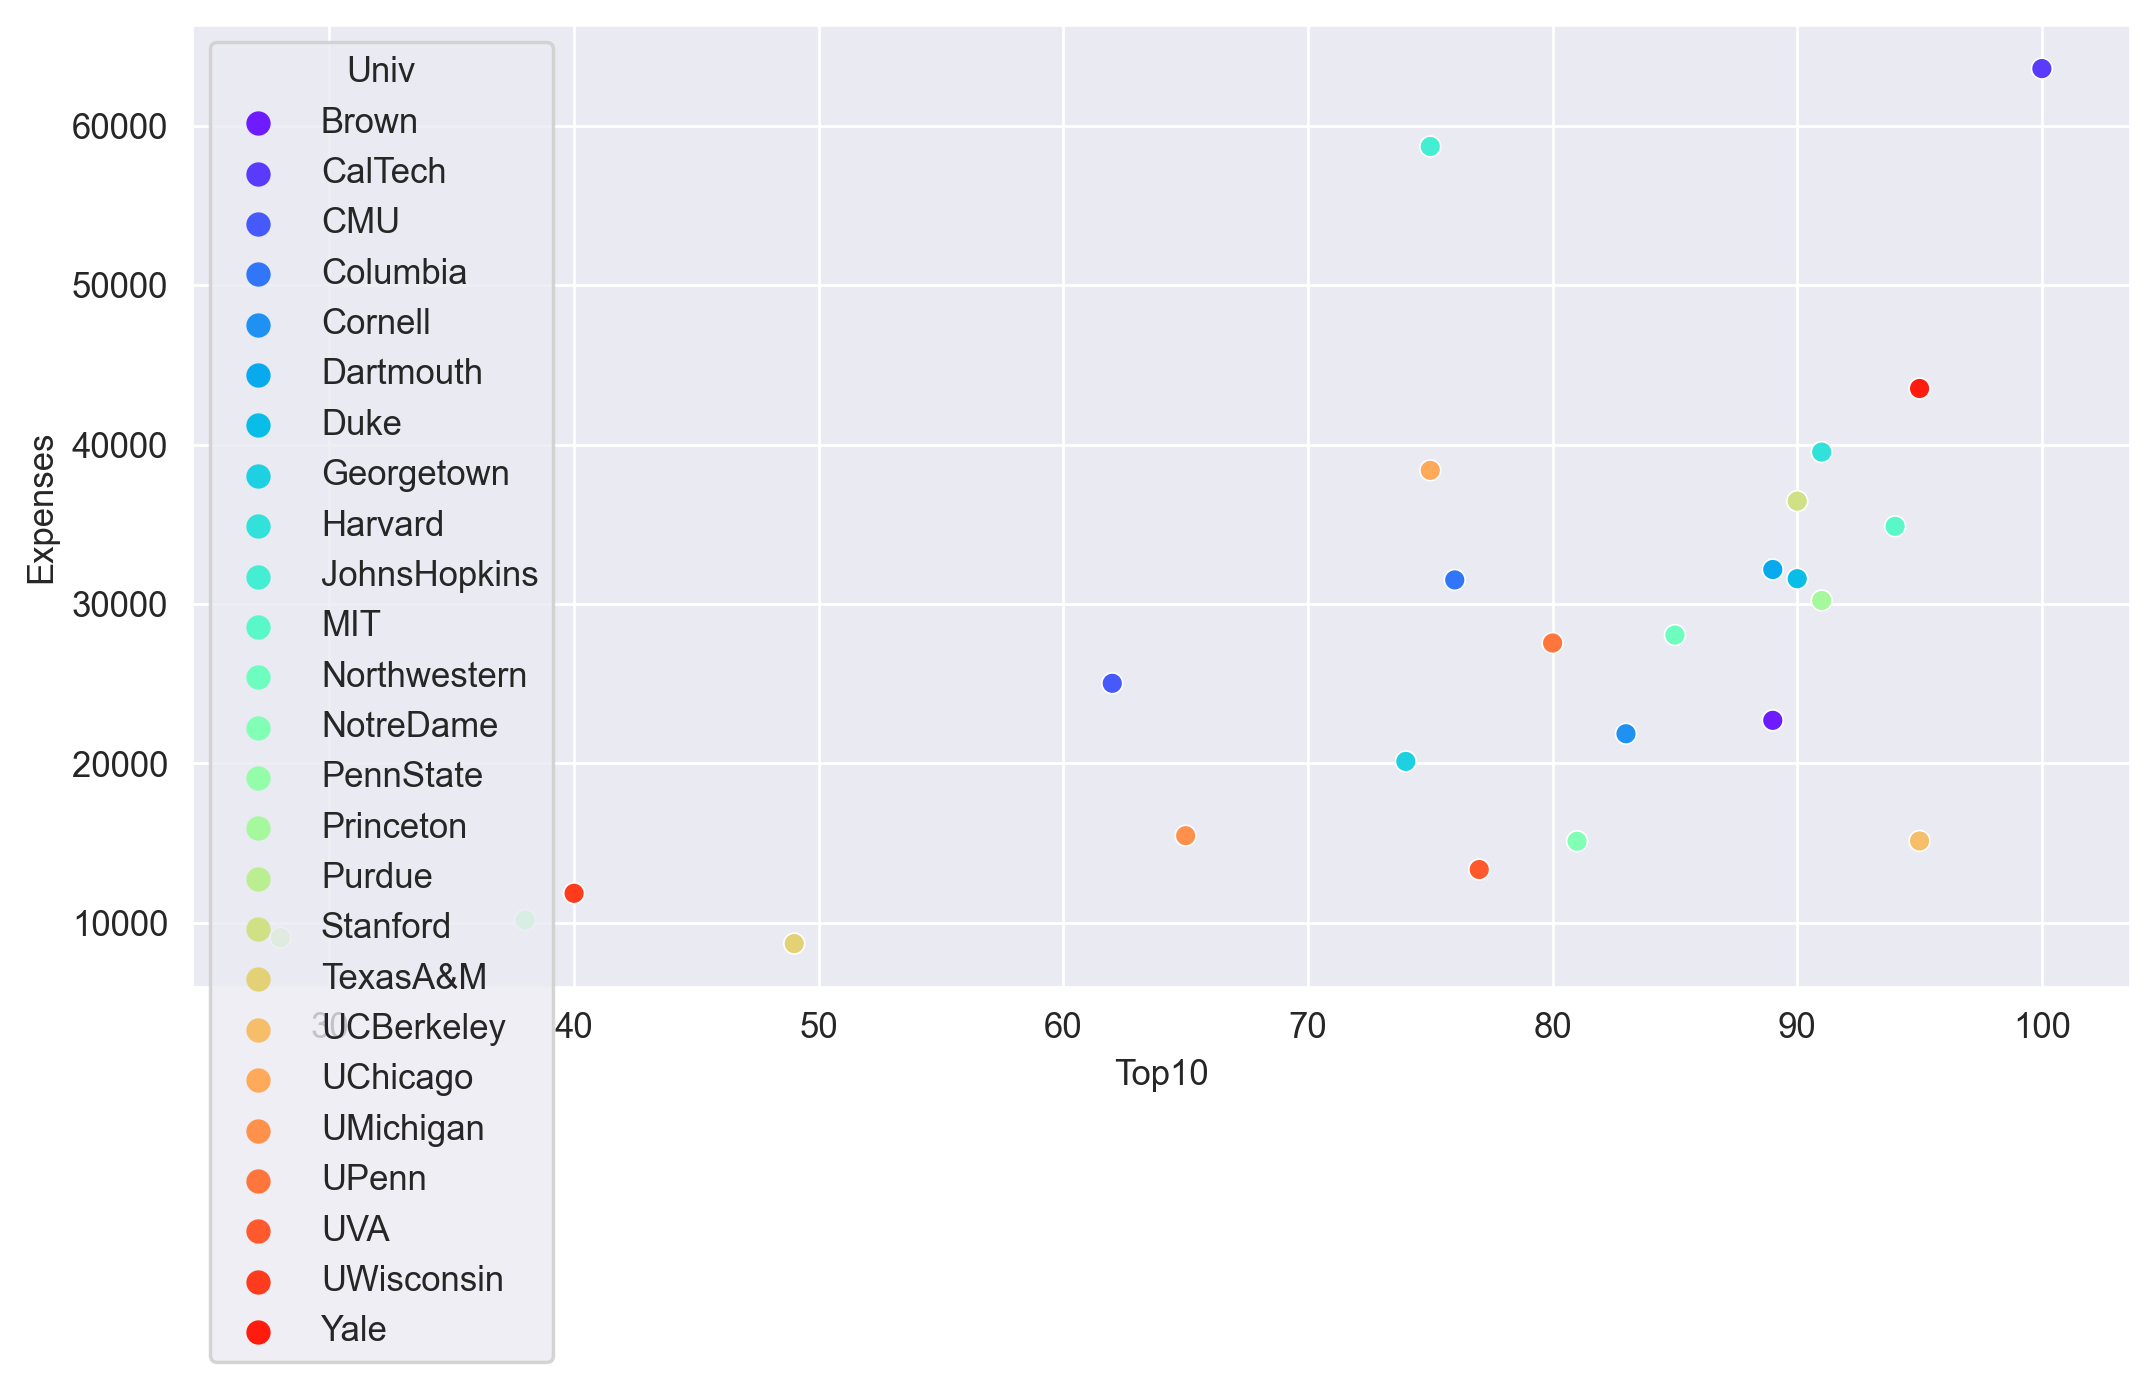

In [18]:
sns.scatterplot(df['Top10'], df['Expenses'], hue=df['Univ'],palette='rainbow')

In [19]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = df.iloc[:,1:]
y = df['Cluster']

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [23]:
xtrain

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
19,1290,75,50,13,38380,87,0
4,1280,83,33,13,21864,90,0
2,1260,62,59,9,25026,72,0
20,1180,65,68,16,15470,85,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,0
22,1225,77,44,14,13349,92,0
1,1415,100,25,6,63575,81,0
16,1360,90,20,12,36450,93,0
0,1310,89,22,13,22704,94,0


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg = LogisticRegression()

In [26]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [27]:
len(xtest)


7

In [28]:
len(ypred)

7

In [29]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [0 1 1 0 0 0 0]
Predict Y: [0 1 1 0 0 0 0]


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [32]:
confusion_matrix(ytest,ypred)


array([[5, 0],
       [0, 2]], dtype=int64)

Text(241.30555555555557, 0.5, 'Predicted Values')

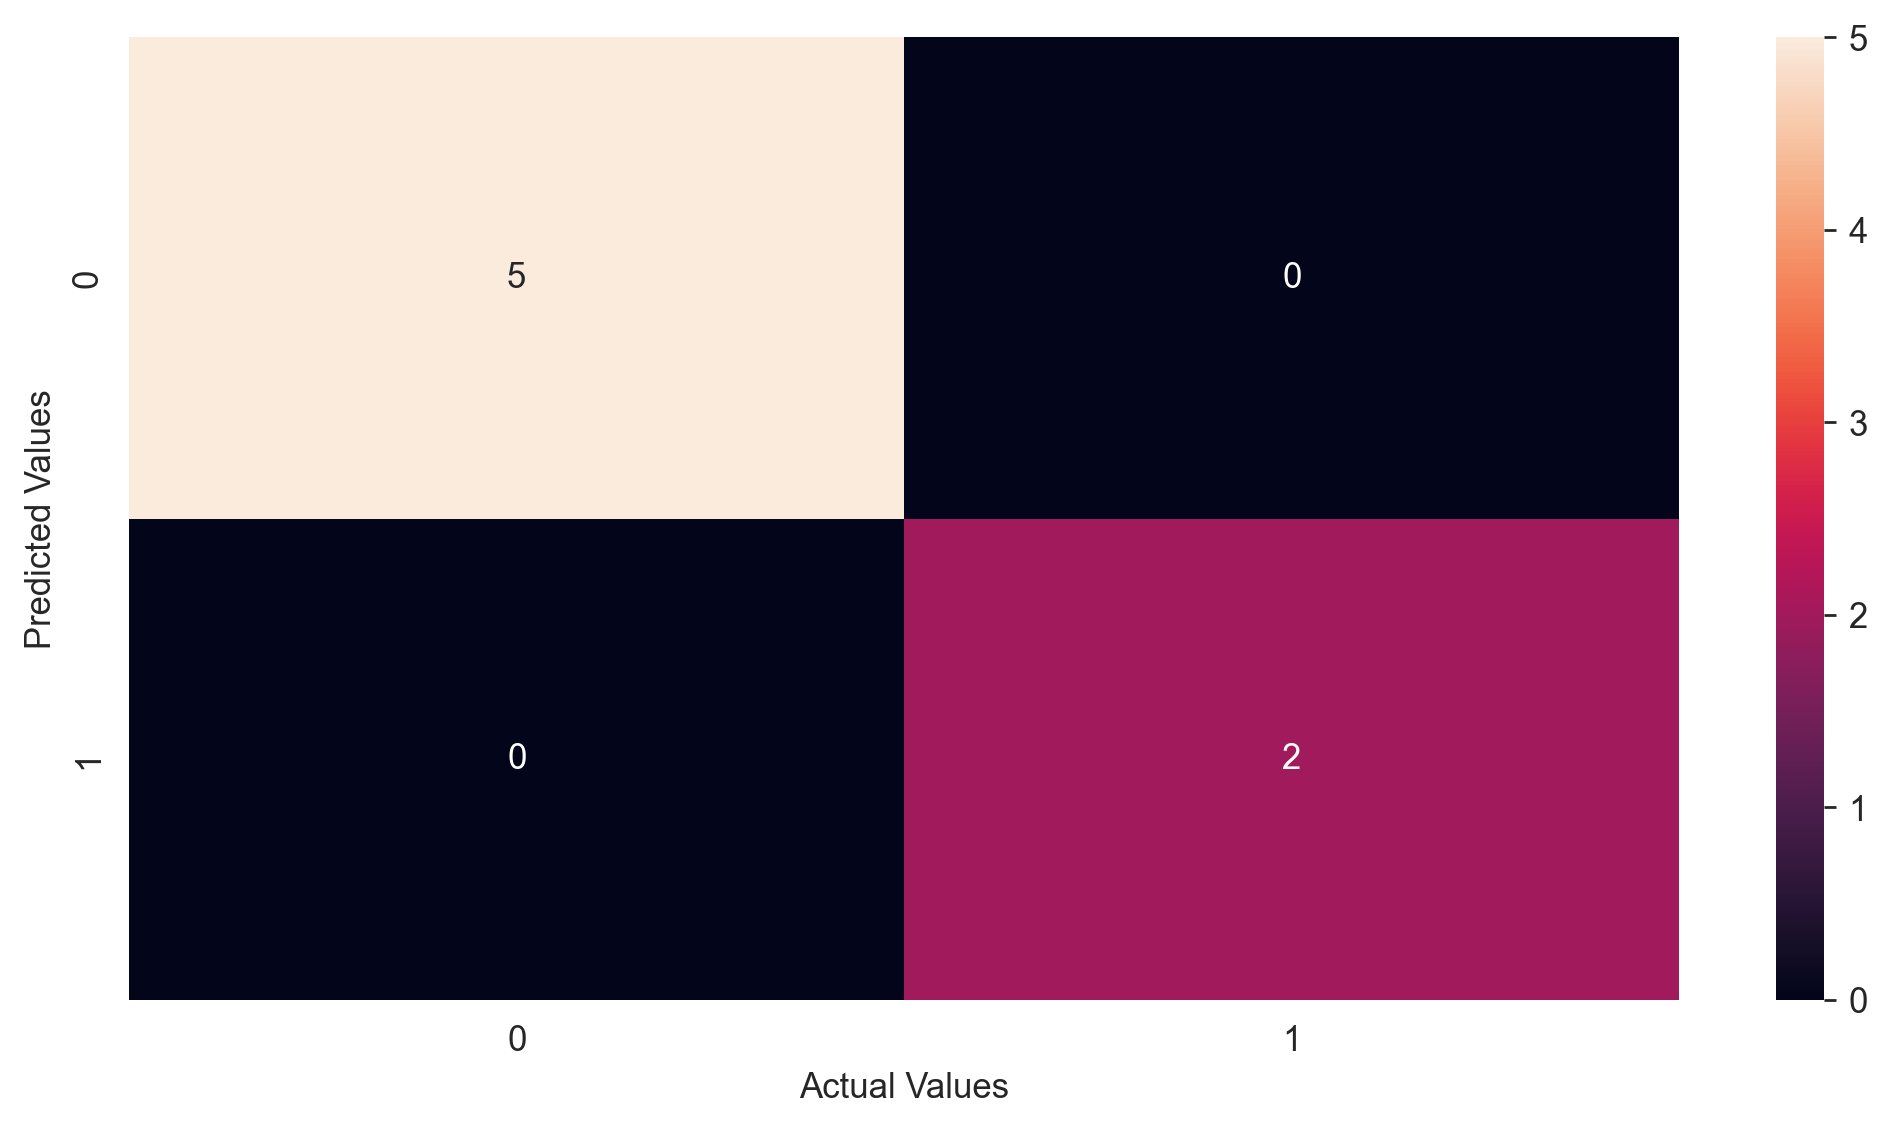

In [33]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [34]:
print(ytest[:25].values)
print(ypred[:25])

[0 1 1 0 0 0 0]
[0 1 1 0 0 0 0]
